# Analysing evaluation results for composite reward with CAPPED accum waiting time

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)     # Show all rows
pd.set_option("display.max_colwidth", None) # Show full width of columns
pd.set_option("display.width", 1000)        # Set the total width of the terminal output

import sys 
sys.path.append("../")
from data_analysis_functions import generate_summary_df_from_csv, get_df_from_csv, get_trained_and_fixed_from_csv # type: ignore

In [2]:
# sys.path.remove("data_analysis_after_train")
TRAINED_CHECKPOINT_PATHS = ["reward_experiments/2x2grid/combined_reward_with_queue_length/EVALUATION/PPO_2024-05-06_11_39__alpha_0.45",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_12_05__alpha_0.6", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_14_43__alpha_0.8", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_15_54__alpha_0.7", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_17_47__alpha_0.65",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_18_55__alpha_0.75", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_19_57__alpha_0.9", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_21_00__alpha_1", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-17_21_58__alpha_1.1", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_11_46__alpha_0.6",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_15_47__alpha_1.5",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_17_19__alpha_2",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_19_58__delta_wait_time_reward_capped", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_20_46__alpha_3", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-18_23_01__alpha_5", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-20_09_18__alpha_10",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-20_10_39__alpha_1_reduced_observation_space",
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-20_13_16__alpha_1_single_observ", 
                            "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-16_09_54__alpha_0_from_2x2_diff_acc"
                            ]

TRAINED_CHECKPOINT_PATHS_ABS = [os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", x) for x in TRAINED_CHECKPOINT_PATHS]

In [3]:
def concaten_alpha_tuning_summary_for_specific_seed(seed):
    '''
    Takes in a seed, and calls the generate summary dataframe. 
    '''

    fixed_tc_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                    eval_dir = "fixed_tc", 
                                    df_row_label = "fixed_tc",
                                    seed = seed)
    # trained_0_6_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[1], 
    #                                 eval_dir = "trained", 
    #                                 df_row_label = "alpha_0_6",
    #                                 seed = seed)
    trained_0_8_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[2], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_8",
                                    seed = seed)
    trained_0_7_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[3], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_7",
                                    seed = seed)
    trained_0_65_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[4], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_0_65",
                                seed = seed)
    trained_0_75_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[5], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_0_75",
                                seed = seed)
    trained_0_9_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[6], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_0_9",
                                seed = seed)
    trained_1_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[7], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_1",
                                seed = seed)
    trained_1_1_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[8], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_1_1",
                            seed = seed)
    trained_0_6_constant_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[9], # this is with constant conditions! 
                            eval_dir = "trained", 
                            df_row_label = "alpha_0_6",
                            seed = seed)
    trained_1_5_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[10], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_1_5",
                            seed = seed)
    trained_2_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[11], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_2",
                            seed = seed)
    trained_delta_wait_time_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[12], 
                            eval_dir = "trained", 
                            df_row_label = "trained_delta_wait_time",
                            seed = seed)
    trained_3_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[13], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_3",
                            seed = seed)
    trained_5_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[14], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_5",
                            seed = seed)
    trained_10_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[15], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_10",
                            seed = seed)
    trained_0_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[18], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_0",
                            seed = seed)
    
    alpha_tuning_experiment_df = pd.concat([fixed_tc_df,
                                    #  trained_0_6_df,
                                     trained_0_df,
                                     trained_0_6_constant_df,
                                     trained_0_65_df,
                                     trained_0_7_df,
                                     trained_0_75_df,
                                     trained_0_8_df,
                                     trained_0_9_df,
                                     trained_1_df,
                                     trained_1_1_df, 
                                     trained_1_5_df,
                                     trained_2_df,
                                     trained_3_df,
                                     trained_5_df,
                                     trained_10_df,
                                     trained_delta_wait_time_df], axis=0)
    return alpha_tuning_experiment_df

def concaten_reducing_obs_investigation_summary_for_specific_seed(seed):
    '''
    Takes in a seed, and calls the generate summary dataframe. 
    '''
    fixed_tc_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                    eval_dir = "fixed_tc", 
                                    df_row_label = "fixed_tc",
                                    seed = seed)
    
    trained_1_reduced_obs_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[16], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_1_reduced_observations",
                            seed = seed)
    trained_1_single_obs_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[17], 
                            eval_dir = "trained", 
                            df_row_label = "alpha_1_single_obs",
                            seed = seed)
    trained_1_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[7], 
                                eval_dir = "trained", 
                                df_row_label = "alpha_1",
                                seed = seed)
    trained_delta_wait_time_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[12], 
                            eval_dir = "trained", 
                            df_row_label = "trained_delta_wait_time",
                            seed = seed)
    reducing_obs_experiment_df = pd.concat([fixed_tc_df,
                                    trained_1_df,
                                    trained_1_reduced_obs_df,
                                    trained_1_single_obs_df, 
                                    trained_delta_wait_time_df], axis=0)
    return reducing_obs_experiment_df

get dfs for all seeds, and concat

In [4]:
SUMO_SEEDS = [10, 15, 22, 31, 55, 39, 83, 49, 51, 74]
SUMO_SEEDS = [10, 22, 39, 31, 55]

SUMO_SEEDS = [10, 15, 22, 31, 55, 39, 83, 49, 51, 74]

alpha_dfs = [concaten_alpha_tuning_summary_for_specific_seed(seed) for seed in SUMO_SEEDS]

# Step 2: Concatenate them along the row axis
alpha_df_combined = pd.concat(alpha_dfs, axis=0, ignore_index=False)

alpha_df_combined

,sys_abs_accel_episode_mean,sys_abs_accel_episode_rms,sys_abs_accel_episode_var,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_abs_accel_episode_ms,sys_avg_speed_episode_mean,sys_avg_speed_episode_max,sys_avg_speed_episode_min,sys_avg_speed_episode_range,sys_avg_speed_episode_median,sys_avg_speed_episode_variance,sys_total_stopped_episode_mean,sys_avg_waiting_time_episode_mean,1_abs_accel_sum,2_abs_accel_sum,5_abs_accel_sum,6_abs_accel_sum,1_abs_accel_mean,2_abs_accel_mean,5_abs_accel_mean,6_abs_accel_mean,1_accumulated_waiting_time_mean,2_accumulated_waiting_time_mean,5_accumulated_waiting_time_mean,6_accumulated_waiting_time_mean,all_agents_abs_accel_episode_rms,all_agents_abs_accel_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time
fixed_tc,17.799791,19.427774,60.617974,88998.956683,88978.900209,377.438422,6.265263,15.287334,0.272280,15.015054,6.576319,4.984019,11.6588,241.2870,21770.531872,15099.992729,15729.443930,10825.662088,4.354106,3.019999,3.145889,2.165132,92.7130,63.6820,71.5226,49.6070,14.415043,12.685126,11.6588,58294.0,277.5246
alpha_0,0.217415,1.375859,1.846089,1087.072730,1087.072730,1.892989,0.095051,15.287334,0.000000,15.287334,0.000000,0.801492,74.5494,182870.5416,532.351673,260.888503,279.987995,0.000000,0.106470,0.052178,0.055998,0.000000,33493.6000,16757.3000,16706.1000,0.0000,1.355469,0.214646,74.5494,372747.0,66957.0000
alpha_0_6,4.054267,4.626360,4.967122,20271.332896,20268.856422,21.403206,2.216566,15.287334,0.000000,15.287334,2.147648,1.233980,37.3192,91546.0530,3837.162571,2632.047577,3508.684766,2538.816864,0.767433,0.526410,0.701737,0.507763,16794.9888,0.0002,16706.1056,0.0000,3.097057,2.503342,37.3192,186596.0,33501.0946
alpha_0_65,9.393325,10.484188,21.687984,46966.622767,46961.978690,109.918192,4.429927,15.287334,1.040909,14.246425,4.392482,1.134501,19.5140,45995.1320,3264.630242,2620.200211,12151.233173,11064.882482,0.652926,0.524040,2.430247,2.212976,16794.9110,0.0000,3.7310,2.2140,6.880134,5.820189,19.5140,97570.0,16800.8560
alpha_0_7,17.450024,18.910003,53.095475,87250.121026,87241.893196,357.588201,5.433512,15.287334,1.784191,13.503143,5.379081,1.218217,12.7814,212.8304,29550.411369,10169.799439,12513.436335,11582.499339,5.910082,2.033960,2.502687,2.316500,1189.7762,2.4522,2.8668,2.6156,14.261544,12.763229,12.7814,63907.0,1197.7108
alpha_0_75,15.743942,17.049551,42.824039,78719.709837,78712.026743,290.687183,10.216625,15.287334,5.788285,9.499049,10.240861,1.432552,1.6166,8.5526,15224.893217,13092.581610,13331.567326,11180.822984,3.044979,2.618516,2.666313,2.236165,3.7680,2.3372,2.4164,1.4978,11.887095,10.565973,1.6166,8083.0,10.0194
alpha_0_8,16.793392,18.007421,42.257650,83966.960324,83961.399982,324.267215,9.959371,15.287334,5.265554,10.021780,9.951863,1.455701,1.8298,9.2852,16450.556734,13437.644662,14543.097699,12302.916248,3.290111,2.687529,2.908620,2.460583,4.4596,2.0002,2.8902,1.8582,12.576094,11.346843,1.8298,9149.0,11.2082
alpha_0_9,14.808034,16.058508,38.605548,74040.167854,74035.857185,257.875685,10.426524,15.287334,7.162871,8.124463,10.412390,1.273792,1.5252,9.5266,13642.429486,12152.823917,12234.323792,10799.508498,2.728486,2.430565,2.446865,2.159902,4.1092,2.3332,2.2092,1.8916,10.955222,9.765817,1.5252,7626.0,10.5432
alpha_1,15.188050,16.485208,41.093431,75940.249388,75934.883834,271.762072,10.288791,15.287334,6.834169,8.453165,10.288984,1.236791,1.6512,10.0494,14033.467724,12660.222176,12933.978504,10710.179299,2.806694,2.532044,2.586796,2.142036,4.3720,2.7200,2.4720,1.7838,11.317634,10.067570,1.6512,8256.0,11.3478
alpha_1_1,15.375882,16.627298,40.057325,76879.408285,76875.004569,276.467050,10.307064,15.287334,6.136022,9.151312,10.320618,1.230447,1.5376,9.1100,14052.909717,12395.075599,12930.736248,11532.376213,2.810582,2.479015,2.586147,2.306475,4.0578,2.2906,1.9852,1.7828,11.413049,10.182220,1.5376,7688.0,10.1164


In [5]:
# Step 3: Compute the mean for each row
df_average_whole_experiment = alpha_df_combined.groupby(alpha_df_combined.index).mean()
df_average_whole_experiment

,sys_abs_accel_episode_mean,sys_abs_accel_episode_rms,sys_abs_accel_episode_var,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_abs_accel_episode_ms,sys_avg_speed_episode_mean,sys_avg_speed_episode_max,sys_avg_speed_episode_min,sys_avg_speed_episode_range,sys_avg_speed_episode_median,sys_avg_speed_episode_variance,sys_total_stopped_episode_mean,sys_avg_waiting_time_episode_mean,1_abs_accel_sum,2_abs_accel_sum,5_abs_accel_sum,6_abs_accel_sum,1_abs_accel_mean,2_abs_accel_mean,5_abs_accel_mean,6_abs_accel_mean,1_accumulated_waiting_time_mean,2_accumulated_waiting_time_mean,5_accumulated_waiting_time_mean,6_accumulated_waiting_time_mean,all_agents_abs_accel_episode_rms,all_agents_abs_accel_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time
alpha_0,0.212633,1.345267,1.768167,1063.166221,1063.166221,1.813039,0.088524,13.945391,0.000000,13.945391,0.000000,0.658940,74.35190,181912.78146,527.581290,266.791448,265.765307,0.000000,0.105516,0.053358,0.053153,0.000000,33414.56000,16705.12000,16639.80000,0.00000,1.341418,0.212028,74.35190,371759.5,66759.48000
alpha_0_6,3.693141,4.238743,4.337048,18465.705141,18464.003194,18.003328,2.104129,13.958721,0.064126,13.894596,2.005285,1.179042,37.21928,87699.01338,3191.199015,2628.435987,2955.036451,2569.465045,0.638240,0.525687,0.591007,0.513893,16609.71822,-1.30714,16639.80128,0.00104,2.825171,2.268827,37.21928,186096.4,33248.21340
alpha_0_65,9.198085,10.301572,21.530414,45990.423821,45984.628388,106.200899,4.362561,13.989224,0.513892,13.475332,4.318185,1.156971,19.42440,45494.55906,2811.588977,2549.584474,11609.399084,11668.677273,0.562318,0.509917,2.321880,2.333735,16692.12110,0.00000,3.32852,2.47518,6.808998,5.727850,19.42440,97122.0,16697.92480
alpha_0_7,17.105089,18.542910,51.267588,85525.445560,85516.171537,343.916688,5.411514,13.945391,0.938426,13.006965,5.404615,1.206819,12.46920,188.94556,29702.918651,9946.180752,11631.436892,11618.063839,5.940584,1.989236,2.326287,2.323613,1099.48436,1.99324,2.99182,2.37974,14.077754,12.579720,12.46920,62346.0,1106.84916
alpha_0_75,14.326129,15.556540,36.817015,71630.646232,71622.453045,242.326629,10.408292,14.361833,2.956817,11.405017,10.438078,1.399944,1.49750,9.03446,12095.431310,11801.904737,11979.254146,11525.916229,2.419086,2.360381,2.395851,2.305183,3.55070,2.26472,2.50036,1.80944,10.700120,9.480501,1.49750,7487.5,10.12522
alpha_0_8,14.572935,15.809348,37.597424,72864.676539,72857.341685,250.586062,10.359318,14.314243,3.029517,11.284725,10.376135,1.403523,1.52848,9.01960,12405.269981,12012.946810,12096.250778,11730.101005,2.481054,2.402589,2.419250,2.346020,3.48508,2.39304,2.48808,1.84964,10.867136,9.648914,1.52848,7642.4,10.21584
alpha_0_9,14.229593,15.462562,36.648223,71147.965648,71141.453702,239.221218,10.429525,14.437939,3.206148,11.231791,10.460114,1.392226,1.49264,9.23666,11897.665929,11773.057182,11854.122763,11389.236877,2.379533,2.354611,2.370825,2.277847,3.21970,2.69752,2.31218,2.05916,10.598791,9.382817,1.49264,7463.2,10.28856
alpha_1,14.316728,15.552808,36.954286,71583.638998,71576.271877,242.049164,10.414959,14.431162,3.039129,11.392033,10.440466,1.367224,1.49344,9.10878,11864.732641,11903.885354,12065.982596,11374.644871,2.372947,2.380777,2.413197,2.274929,3.58594,2.44788,2.26092,1.86896,10.663885,9.441849,1.49344,7467.2,10.16370
alpha_10,16.849342,18.038419,41.543411,84246.711945,84237.357714,325.628787,10.184966,14.229770,2.747591,11.482179,10.224292,1.447242,1.27134,5.29154,13494.533890,14891.803903,14215.331375,13926.686907,2.698907,2.978361,2.843066,2.785337,2.36454,1.82612,1.55128,0.80374,12.539207,11.305671,1.27134,6356.7,6.54568
alpha_1_1,14.486259,15.749758,38.241172,72431.294138,72424.291531,248.279519,10.410741,14.334191,2.987026,11.347165,10.420125,1.370504,1.47072,8.73830,11849.962835,12005.251565,11989.447941,11859.113287,2.369993,2.401050,2.397890,2.371823,3.40882,2.37810,2.08280,1.87766,10.780778,9.540755,1.47072,7353.6,9.74738


In [6]:
df_average_whole_experiment_ordered = df_average_whole_experiment.reindex([
                                         'alpha_0',
                                         'alpha_0_6', 
                                         'alpha_0_65', 
                                         "alpha_0_7", 
                                         "alpha_0_75", 
                                         "alpha_0_8",
                                         "alpha_0_9", 
                                         "alpha_1",
                                         "alpha_1_1",
                                         "alpha_1_5", 
                                         "alpha_2",
                                         "alpha_3",
                                         "alpha_5",
                                         "alpha_10",
                                         "trained_delta_wait_time",
                                         "fixed_tc"])

In [7]:
df_subset = df_average_whole_experiment_ordered[["sys_abs_accel_episode_sum",
                                                 "sys_abs_accel_episode_mean",
                             "sys_abs_accel_episode_ms",
                             "sys_avg_waiting_time_episode_mean",
                             "sys_avg_speed_episode_mean",

                             "1_abs_accel_mean",
                             '1_abs_accel_sum',
                             "1_accumulated_waiting_time_mean",

                             '2_abs_accel_mean',
                             '2_abs_accel_sum', 
                             "2_accumulated_waiting_time_mean",

                             '5_abs_accel_mean', 
                             '5_abs_accel_sum',
                             "5_accumulated_waiting_time_mean",

                             '6_abs_accel_mean', 
                             '6_abs_accel_sum',
                             "6_accumulated_waiting_time_mean"
                             ]]

df_subset

,sys_abs_accel_episode_sum,sys_abs_accel_episode_mean,sys_abs_accel_episode_ms,sys_avg_waiting_time_episode_mean,sys_avg_speed_episode_mean,1_abs_accel_mean,1_abs_accel_sum,1_accumulated_waiting_time_mean,2_abs_accel_mean,2_abs_accel_sum,2_accumulated_waiting_time_mean,5_abs_accel_mean,5_abs_accel_sum,5_accumulated_waiting_time_mean,6_abs_accel_mean,6_abs_accel_sum,6_accumulated_waiting_time_mean
alpha_0,1063.166221,0.212633,1.813039,181912.78146,0.088524,0.105516,527.581290,33414.56000,0.053358,266.791448,16705.12000,0.053153,265.765307,16639.80000,0.000000,0.000000,0.00000
alpha_0_6,18465.705141,3.693141,18.003328,87699.01338,2.104129,0.638240,3191.199015,16609.71822,0.525687,2628.435987,-1.30714,0.591007,2955.036451,16639.80128,0.513893,2569.465045,0.00104
alpha_0_65,45990.423821,9.198085,106.200899,45494.55906,4.362561,0.562318,2811.588977,16692.12110,0.509917,2549.584474,0.00000,2.321880,11609.399084,3.32852,2.333735,11668.677273,2.47518
alpha_0_7,85525.445560,17.105089,343.916688,188.94556,5.411514,5.940584,29702.918651,1099.48436,1.989236,9946.180752,1.99324,2.326287,11631.436892,2.99182,2.323613,11618.063839,2.37974
alpha_0_75,71630.646232,14.326129,242.326629,9.03446,10.408292,2.419086,12095.431310,3.55070,2.360381,11801.904737,2.26472,2.395851,11979.254146,2.50036,2.305183,11525.916229,1.80944
alpha_0_8,72864.676539,14.572935,250.586062,9.01960,10.359318,2.481054,12405.269981,3.48508,2.402589,12012.946810,2.39304,2.419250,12096.250778,2.48808,2.346020,11730.101005,1.84964
alpha_0_9,71147.965648,14.229593,239.221218,9.23666,10.429525,2.379533,11897.665929,3.21970,2.354611,11773.057182,2.69752,2.370825,11854.122763,2.31218,2.277847,11389.236877,2.05916
alpha_1,71583.638998,14.316728,242.049164,9.10878,10.414959,2.372947,11864.732641,3.58594,2.380777,11903.885354,2.44788,2.413197,12065.982596,2.26092,2.274929,11374.644871,1.86896
alpha_1_1,72431.294138,14.486259,248.279519,8.73830,10.410741,2.369993,11849.962835,3.40882,2.401050,12005.251565,2.37810,2.397890,11989.447941,2.08280,2.371823,11859.113287,1.87766
alpha_1_5,72519.567722,14.503914,248.124713,7.90204,10.455611,2.350484,11752.417587,3.06170,2.441901,12209.506386,2.14286,2.406064,12030.321569,2.08556,2.362299,11811.497396,1.58432


In [8]:
df_system_wide = df_average_whole_experiment_ordered[
                            ["sys_abs_accel_episode_mean",
                            "sys_abs_accel_episode_sum",
                            "sys_abs_accel_episode_ms",
                            "sys_avg_waiting_time_episode_mean",
                            ]
                            ]
df_system_wide

,sys_abs_accel_episode_mean,sys_abs_accel_episode_sum,sys_abs_accel_episode_ms,sys_avg_waiting_time_episode_mean
alpha_0,0.212633,1063.166221,1.813039,181912.78146
alpha_0_6,3.693141,18465.705141,18.003328,87699.01338
alpha_0_65,9.198085,45990.423821,106.200899,45494.55906
alpha_0_7,17.105089,85525.445560,343.916688,188.94556
alpha_0_75,14.326129,71630.646232,242.326629,9.03446
alpha_0_8,14.572935,72864.676539,250.586062,9.01960
alpha_0_9,14.229593,71147.965648,239.221218,9.23666
alpha_1,14.316728,71583.638998,242.049164,9.10878
alpha_1_1,14.486259,72431.294138,248.279519,8.73830
alpha_1_5,14.503914,72519.567722,248.124713,7.90204


In [9]:
wait_time_descending = df_system_wide.sort_values(by="sys_avg_waiting_time_episode_mean", axis=0, ascending=False).drop(['alpha_0_9'])

wait_time_descending.loc[:, ["sys_avg_waiting_time_episode_mean",
                             "sys_abs_accel_episode_mean", 
                             "sys_abs_accel_episode_sum", 
                             "sys_abs_accel_episode_ms"]]

,sys_avg_waiting_time_episode_mean,sys_abs_accel_episode_mean,sys_abs_accel_episode_sum,sys_abs_accel_episode_ms
alpha_0,181912.78146,0.212633,1063.166221,1.813039
alpha_0_6,87699.01338,3.693141,18465.705141,18.003328
alpha_0_65,45494.55906,9.198085,45990.423821,106.200899
fixed_tc,227.54018,16.877811,84389.056214,342.624088
alpha_0_7,188.94556,17.105089,85525.445560,343.916688
alpha_1,9.10878,14.316728,71583.638998,242.049164
alpha_0_75,9.03446,14.326129,71630.646232,242.326629
alpha_0_8,9.01960,14.572935,72864.676539,250.586062
alpha_1_1,8.73830,14.486259,72431.294138,248.279519
alpha_1_5,7.90204,14.503914,72519.567722,248.124713


## Plots for report + Appendix

In [10]:
df_system_wide_whole_numbers = df_system_wide.loc[[
                                    "fixed_tc",
                                    "alpha_0",
                                    "alpha_0_9",
                                    "alpha_1",
                                    "alpha_2",
                                    "alpha_3",
                                    "alpha_5",
                                    "alpha_10",
                                    "trained_delta_wait_time"
                                    ], :]
df_system_wide_whole_numbers.loc[:, ["sys_avg_waiting_time_episode_mean",
                                     'sys_abs_accel_episode_sum',
                                     'sys_abs_accel_episode_mean',
                                     "sys_abs_accel_episode_ms"]]

,sys_avg_waiting_time_episode_mean,sys_abs_accel_episode_sum,sys_abs_accel_episode_mean,sys_abs_accel_episode_ms
fixed_tc,227.54018,84389.056214,16.877811,342.624088
alpha_0,181912.78146,1063.166221,0.212633,1.813039
alpha_0_9,9.23666,71147.965648,14.229593,239.221218
alpha_1,9.10878,71583.638998,14.316728,242.049164
alpha_2,7.30794,76011.089951,15.202218,269.533767
alpha_3,6.78498,74409.058196,14.881812,260.609274
alpha_5,6.13562,75851.821024,15.170364,269.317570
alpha_10,5.29154,84246.711945,16.849342,325.628787
trained_delta_wait_time,4.84860,83435.067320,16.687013,320.155417


/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_57160/3349209581.py:51: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax1.set_ylim(0, df_system_wide_whole_numbers['sys_avg_waiting_time_episode_mean'].max() + 2)
/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_57160/3349209581.py:52: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax2.set_ylim(0, df_system_wide_whole_numbers['sys_abs_accel_episode_mean'].max() + 2)


<Figure size 800x500 with 0 Axes>

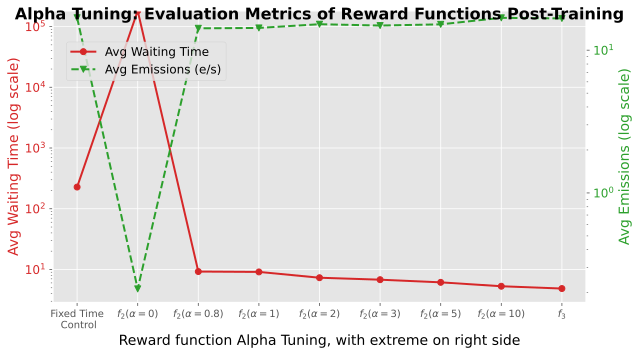

In [11]:
import matplotlib.pyplot as plt

# Create a larger figure to improve readability
plt.figure(figsize=(8, 5))
plt.style.use('ggplot')

# Plot the first series with the first y-axis
fig, ax1 = plt.subplots(figsize=(9, 5))
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plot the first series (avg waiting time) with a logarithmic y-axis
ax1.plot(df_system_wide_whole_numbers.index, df_system_wide_whole_numbers['sys_avg_waiting_time_episode_mean'], 
         color='tab:red', label='Avg Waiting Time', linewidth=2, linestyle='-', marker='o')
ax1.set_xlabel('Reward function Alpha Tuning, with extreme on right side', fontsize=14)
ax1.set_ylabel('Avg Waiting Time (log scale)', fontsize=14, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.grid(True)
ax1.set_yscale('log')

# Plot the second series (absolute acceleration) on a second y-axis with a logarithmic scale
ax2 = ax1.twinx()
ax2.plot(df_system_wide_whole_numbers.index, df_system_wide_whole_numbers['sys_abs_accel_episode_mean'], 
         color='tab:green', label='Avg Emissions (e/s)', linewidth=2, linestyle='--', marker='v')
ax2.set_ylabel('Avg Emissions (log scale)', fontsize=14, color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)
ax2.grid(False)  # Avoid double grid lines
ax2.set_yscale('log')

new_labels = [
    'Fixed Time\n Control',
    r'$f_2(\alpha=0)$',
    r'$f_2(\alpha=0.8)$',
    r'$f_2(\alpha=1)$',
    r'$f_2(\alpha=2)$',
    r'$f_2(\alpha=3)$',
    r'$f_2(\alpha=5)$',
    r'$f_2(\alpha=10)$',
    '$f_3$'
]
ax1.set_xticks(range(len(df_system_wide_whole_numbers.index)))
ax1.set_xticklabels(new_labels, fontsize=10)

# Adding legends to the plots
fig.tight_layout()
fig.suptitle('Alpha Tuning: Evaluation Metrics of Reward Functions Post-Training', fontsize=16, fontweight='bold')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9), fontsize=12)

# Adjust y-axis limits to make sure all data points are visible
ax1.set_ylim(0, df_system_wide_whole_numbers['sys_avg_waiting_time_episode_mean'].max() + 2)
ax2.set_ylim(0, df_system_wide_whole_numbers['sys_abs_accel_episode_mean'].max() + 2)

# Show the plot
plt.show()

<Figure size 900x500 with 0 Axes>

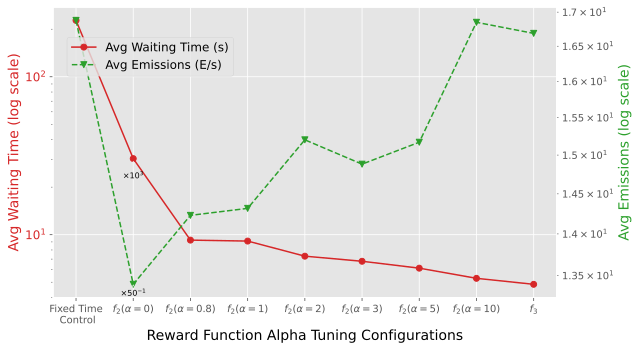

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Create a copy of the dataframe to manipulate the values for plotting
df_plot = df_system_wide_whole_numbers.copy()

# Apply specific transformations for alpha = 0
df_plot.at['alpha_0', 'sys_avg_waiting_time_episode_mean'] /= 6000  # Scale down by dividing by 1000
df_plot.at['alpha_0', 'sys_abs_accel_episode_mean'] *= 63       # Scale up by multiplying by 50

# Create a larger figure to improve readability
plt.figure(figsize=(9, 5))
plt.style.use('ggplot')

# Plot the first series with the first y-axis
fig, ax1 = plt.subplots(figsize=(9, 5))
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plot the first series (avg waiting time) with a logarithmic y-axis
ax1.plot(df_plot.index, df_plot['sys_avg_waiting_time_episode_mean'], 
         color='tab:red', label='Avg Waiting Time (s)', linewidth=1.5, linestyle='-', marker='o')
ax1.set_xlabel('Reward Function Alpha Tuning Configurations', fontsize=14)
ax1.set_ylabel('Avg Waiting Time (log scale)', fontsize=14, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.grid(True)
ax1.set_yscale('log')

# Annotate the scaled value for alpha = 0 for Avg Waiting Time
scaled_waiting_value = df_plot.at['alpha_0', 'sys_avg_waiting_time_episode_mean']
ax1.annotate(r'$\times 10^3$', fontsize=8,
             xy=('alpha_0', scaled_waiting_value),
             xytext=('alpha_0', scaled_waiting_value*0.75),  # Adjust the position of the annotation
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

# Plot the second series (absolute acceleration) on a second y-axis with a logarithmic scale
ax2 = ax1.twinx()
ax2.plot(df_plot.index, df_plot['sys_abs_accel_episode_mean'], 
         color='tab:green', label='Avg Emissions (E/s)', linewidth=1.5, linestyle='--', marker='v')
ax2.set_ylabel('Avg Emissions (log scale)', fontsize=14, color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)
ax2.grid(False)  # Avoid double grid lines
ax2.set_yscale('log')

# Annotate the scaled value for alpha = 0 for Avg Emissions
scaled_emissions_value = df_plot.at['alpha_0', 'sys_abs_accel_episode_mean']
ax2.annotate(r'$\times 50^{-1}$', fontsize=8,
             xy=('alpha_0', scaled_emissions_value),
             xytext=('alpha_0', scaled_emissions_value*0.99),  # Adjust the position of the annotation
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

# Change x-axis labels to include alpha sign and expressions
new_labels = [
    'Fixed Time\n Control',
    r'$f_2(\alpha=0)$',
    r'$f_2(\alpha=0.8)$',
    r'$f_2(\alpha=1)$',
    r'$f_2(\alpha=2)$',
    r'$f_2(\alpha=3)$',
    r'$f_2(\alpha=5)$',
    r'$f_2(\alpha=10)$',
    '$f_3$'
]
ax1.set_xticks(range(len(df_plot.index)))
ax1.set_xticklabels(new_labels, fontsize=10)

# Adding legends to the plots
fig.tight_layout()
# fig.suptitle('Alpha Tuning: Evaluation Metrics of Reward Functions Post-Training', fontsize=16, fontweight='bold')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9), fontsize=12)

# Show the plot
plt.show()

'Alpha Tuning: Evaluation Metrics of Reward Functions Post-Training'

## keep only whole numbers!

<Figure size 900x500 with 0 Axes>

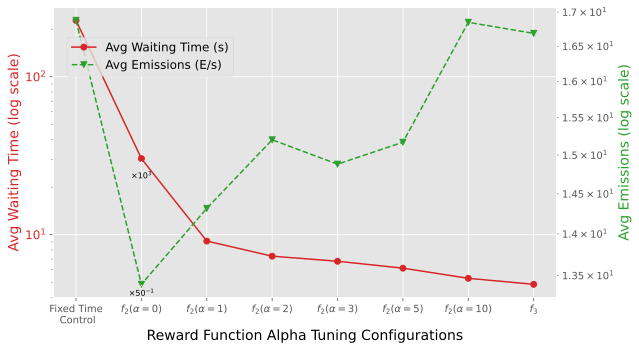

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Create a copy of the dataframe to manipulate the values for plotting
df_plot = df_system_wide_whole_numbers.copy()

# Apply specific transformations for alpha = 0
df_plot.at['alpha_0', 'sys_avg_waiting_time_episode_mean'] /= 6000  # Scale down by dividing by 1000
df_plot.at['alpha_0', 'sys_abs_accel_episode_mean'] *= 63       # Scale up by multiplying by 50

df_plot.drop(['alpha_0_9'], inplace=True)

# Create a larger figure to improve readability
plt.figure(figsize=(9, 5))
plt.style.use('ggplot')

# Plot the first series with the first y-axis
fig, ax1 = plt.subplots(figsize=(9, 5))
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'

# Plot the first series (avg waiting time) with a logarithmic y-axis
ax1.plot(df_plot.index, df_plot['sys_avg_waiting_time_episode_mean'], 
         color='tab:red', label='Avg Waiting Time (s)', linewidth=1.5, linestyle='-', marker='o')
ax1.set_xlabel('Reward Function Alpha Tuning Configurations', fontsize=14)
ax1.set_ylabel('Avg Waiting Time (log scale)', fontsize=14, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.grid(True)
ax1.set_yscale('log')

# Annotate the scaled value for alpha = 0 for Avg Waiting Time
scaled_waiting_value = df_plot.at['alpha_0', 'sys_avg_waiting_time_episode_mean']
ax1.annotate(r'$\times 10^3$', fontsize=8,
             xy=('alpha_0', scaled_waiting_value),
             xytext=('alpha_0', scaled_waiting_value*0.75),  # Adjust the position of the annotation
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

# Plot the second series (absolute acceleration) on a second y-axis with a logarithmic scale
ax2 = ax1.twinx()
ax2.plot(df_plot.index, df_plot['sys_abs_accel_episode_mean'], 
         color='tab:green', label='Avg Emissions (E/s)', linewidth=1.5, linestyle='--', marker='v')
ax2.set_ylabel('Avg Emissions (log scale)', fontsize=14, color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green', labelsize=12)
ax2.grid(False)  # Avoid double grid lines
ax2.set_yscale('log')

# Annotate the scaled value for alpha = 0 for Avg Emissions
scaled_emissions_value = df_plot.at['alpha_0', 'sys_abs_accel_episode_mean']
ax2.annotate(r'$\times 50^{-1}$', fontsize=8,
             xy=('alpha_0', scaled_emissions_value),
             xytext=('alpha_0', scaled_emissions_value*0.99),  # Adjust the position of the annotation
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='center')

# Change x-axis labels to include alpha sign and expressions
new_labels = [
    'Fixed Time\n Control',
    r'$f_2(\alpha=0)$',
    r'$f_2(\alpha=1)$',
    r'$f_2(\alpha=2)$',
    r'$f_2(\alpha=3)$',
    r'$f_2(\alpha=5)$',
    r'$f_2(\alpha=10)$',
    '$f_3$'
]
ax1.set_xticks(range(len(df_plot.index)))
ax1.set_xticklabels(new_labels, fontsize=10)

# Adding legends to the plots
fig.tight_layout()
# fig.suptitle('Alpha Tuning: Evaluation Metrics of Reward Functions Post-Training', fontsize=16, fontweight='bold')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9), fontsize=12)

# Show the plot
plt.show()

## Agent wide metrics

In [14]:
df_agent_metrics = df_average_whole_experiment_ordered[["1_abs_accel_mean",
                             '1_abs_accel_sum',
                             "1_accumulated_waiting_time_mean",

                             '2_abs_accel_mean',
                             '2_abs_accel_sum', 
                             "2_accumulated_waiting_time_mean",

                             '5_abs_accel_mean', 
                             '5_abs_accel_sum',
                             "5_accumulated_waiting_time_mean",

                             '6_abs_accel_mean', 
                             '6_abs_accel_sum',
                             "6_accumulated_waiting_time_mean"]]
df_agent_metrics

,1_abs_accel_mean,1_abs_accel_sum,1_accumulated_waiting_time_mean,2_abs_accel_mean,2_abs_accel_sum,2_accumulated_waiting_time_mean,5_abs_accel_mean,5_abs_accel_sum,5_accumulated_waiting_time_mean,6_abs_accel_mean,6_abs_accel_sum,6_accumulated_waiting_time_mean
alpha_0,0.105516,527.581290,33414.56000,0.053358,266.791448,16705.12000,0.053153,265.765307,16639.80000,0.000000,0.000000,0.00000
alpha_0_6,0.638240,3191.199015,16609.71822,0.525687,2628.435987,-1.30714,0.591007,2955.036451,16639.80128,0.513893,2569.465045,0.00104
alpha_0_65,0.562318,2811.588977,16692.12110,0.509917,2549.584474,0.00000,2.321880,11609.399084,3.32852,2.333735,11668.677273,2.47518
alpha_0_7,5.940584,29702.918651,1099.48436,1.989236,9946.180752,1.99324,2.326287,11631.436892,2.99182,2.323613,11618.063839,2.37974
alpha_0_75,2.419086,12095.431310,3.55070,2.360381,11801.904737,2.26472,2.395851,11979.254146,2.50036,2.305183,11525.916229,1.80944
alpha_0_8,2.481054,12405.269981,3.48508,2.402589,12012.946810,2.39304,2.419250,12096.250778,2.48808,2.346020,11730.101005,1.84964
alpha_0_9,2.379533,11897.665929,3.21970,2.354611,11773.057182,2.69752,2.370825,11854.122763,2.31218,2.277847,11389.236877,2.05916
alpha_1,2.372947,11864.732641,3.58594,2.380777,11903.885354,2.44788,2.413197,12065.982596,2.26092,2.274929,11374.644871,1.86896
alpha_1_1,2.369993,11849.962835,3.40882,2.401050,12005.251565,2.37810,2.397890,11989.447941,2.08280,2.371823,11859.113287,1.87766
alpha_1_5,2.350484,11752.417587,3.06170,2.441901,12209.506386,2.14286,2.406064,12030.321569,2.08556,2.362299,11811.497396,1.58432


In [15]:
45700 / 230

198.69565217391303

In [16]:
230 / 191

1.2041884816753927

When accumulated waiting time exceeds that of fixed time control baseline, we penalise 

## Get the last policy mean reward for each agent

In [17]:
# get reward functions values for all training: 
from tensorflow.python.summary.summary_iterator import summary_iterator
import tensorflow as tf

In [18]:
sys.path.append("../")
log_file = "reward_experiments/2x2grid_with_wait_capped/combined_reward_with_diff_accum_wait/TRAINING/PPO_2024-05-17_12_05__alpha_0.6/PPO_2024-05-17_12_05__alpha_0.6/PPO_2x2grid_with_wait_capped_2024-05-17_12_05_5c89a_00000_0_2024-05-17_12-05-25/events.out.tfevents.1715943947.MacBook-Pro-2"
log_file = os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean", log_file)

count = 0

x = ["ray/tune/policy_reward_mean/1",
    "ray/tune/policy_reward_mean/2", 
    "ray/tune/policy_reward_mean/5",
    "ray/tune/policy_reward_mean/6"] 

policy_reward_dict = {tag:0 for tag in x}

policy_reward_series_dict = {tag:[] for tag in x}

for summary in summary_iterator(os.path.abspath(log_file)):
    for value in summary.summary.value:
        if value.tag in x:
            policy_reward_dict[value.tag] = value.simple_value
            policy_reward_series_dict[value.tag].append(value.simple_value)

# num_env_steps_sampled

# policy_reward_dict
# policy_reward_series_dict.values()[0]

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


/var/folders/nq/yzy9w2_93tj27l52hnwz3knm0000gn/T/ipykernel_57160/3568085729.py:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


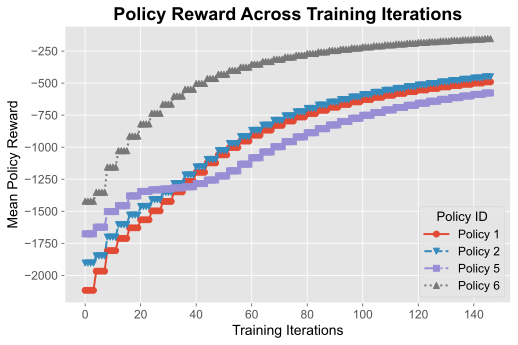

In [19]:
import matplotlib.pyplot as plt

# Create a larger figure to improve readability
plt.figure(figsize=(8, 5))
plt.style.use('ggplot')

%config InlineBackend.figure_format = 'svg'

# Plot each series with distinct styles
plt.plot(policy_reward_series_dict["ray/tune/policy_reward_mean/1"], label='Policy 1', linewidth=2, linestyle='-', marker='o')
plt.plot(policy_reward_series_dict["ray/tune/policy_reward_mean/2"], label='Policy 2', linewidth=2, linestyle='--', marker='v')
plt.plot(policy_reward_series_dict["ray/tune/policy_reward_mean/5"], label='Policy 5', linewidth=2, linestyle='-.', marker='s')
plt.plot(policy_reward_series_dict["ray/tune/policy_reward_mean/6"], label='Policy 6', linewidth=2, linestyle=':', marker='^')

# Improve the aesthetics
plt.title('Policy Reward Across Training Iterations', fontsize=18, fontweight='bold')
plt.xlabel('Training Iterations', fontsize=14)
plt.ylabel('Mean Policy Reward', fontsize=14)
plt.legend(title='Policy ID', title_fontsize='13', fontsize='12', loc='best')
plt.grid(True)

# Set the style of the plot
plt.style.use('seaborn-darkgrid')

# Adjust tick params
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

## Columns of interest to place in report:

In [20]:
df_subset = df_average_whole_experiment_ordered[['sys_abs_accel_episode_sum', 
                             'sys_avg_waiting_time_episode_mean',
                             "sys_total_stopped_episode_mean",
                             "sys_avg_speed_episode_mean",
                             "tot_agent_stopped_episode_mean",
                             "tot_agent_stopped_episode_sum",
                             "tot_agent_accum_wait_time",
                             "all_agents_abs_accel_episode_mean"]]
df_subset

,sys_abs_accel_episode_sum,sys_avg_waiting_time_episode_mean,sys_total_stopped_episode_mean,sys_avg_speed_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time,all_agents_abs_accel_episode_mean
alpha_0,1063.166221,181912.78146,74.35190,0.088524,74.35190,371759.5,66759.48000,0.212028
alpha_0_6,18465.705141,87699.01338,37.21928,2.104129,37.21928,186096.4,33248.21340,2.268827
alpha_0_65,45990.423821,45494.55906,19.42440,4.362561,19.42440,97122.0,16697.92480,5.727850
alpha_0_7,85525.445560,188.94556,12.46920,5.411514,12.46920,62346.0,1106.84916,12.579720
alpha_0_75,71630.646232,9.03446,1.49750,10.408292,1.49750,7487.5,10.12522,9.480501
alpha_0_8,72864.676539,9.01960,1.52848,10.359318,1.52848,7642.4,10.21584,9.648914
alpha_0_9,71147.965648,9.23666,1.49264,10.429525,1.49264,7463.2,10.28856,9.382817
alpha_1,71583.638998,9.10878,1.49344,10.414959,1.49344,7467.2,10.16370,9.441849
alpha_1_1,72431.294138,8.73830,1.47072,10.410741,1.47072,7353.6,9.74738,9.540755
alpha_1_5,72519.567722,7.90204,1.39614,10.455611,1.39614,6980.7,8.87444,9.560749


In [21]:
print(df_subset.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
 & sys_abs_accel_episode_sum & sys_avg_waiting_time_episode_mean & sys_total_stopped_episode_mean & sys_avg_speed_episode_mean & tot_agent_stopped_episode_mean & tot_agent_stopped_episode_sum & tot_agent_accum_wait_time & all_agents_abs_accel_episode_mean \\
\midrule
alpha_0 & 1063.166221 & 181912.781460 & 74.351900 & 0.088524 & 74.351900 & 371759.500000 & 66759.480000 & 0.212028 \\
alpha_0_6 & 18465.705141 & 87699.013380 & 37.219280 & 2.104129 & 37.219280 & 186096.400000 & 33248.213400 & 2.268827 \\
alpha_0_65 & 45990.423821 & 45494.559060 & 19.424400 & 4.362561 & 19.424400 & 97122.000000 & 16697.924800 & 5.727850 \\
alpha_0_7 & 85525.445560 & 188.945560 & 12.469200 & 5.411514 & 12.469200 & 62346.000000 & 1106.849160 & 12.579720 \\
alpha_0_75 & 71630.646232 & 9.034460 & 1.497500 & 10.408292 & 1.497500 & 7487.500000 & 10.125220 & 9.480501 \\
alpha_0_8 & 72864.676539 & 9.019600 & 1.528480 & 10.359318 & 1.528480 & 7642.400000 & 10.215840 & 9.648914 \\


## Stats analysis - looking at the energies of 2 terms in reward function - at what ratio of energies can we correlate with better overall system performance? 

In [22]:
fixed_tc_df = get_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                eval_dir = "fixed_tc", 
                                csv_file_name='eval_metrics.csv',
                                seed = 10)
trained_0_8_df = get_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[1], 
                                eval_dir = "trained",
                                csv_file_name='eval_metrics.csv',
                                seed = 10)

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
type((fixed_tc_df['1_accumulated_waiting_time']/100).diff())

pandas.core.series.Series

perform the transformations on accumulated waiting time

In [24]:
agent_1_fc_accum_wait_group_five = fixed_tc_df['1_accumulated_waiting_time'].groupby(
    fixed_tc_df['1_accumulated_waiting_time'].index // 5).sum()

agent_1_fc_accum_wait_scale_diff = (agent_1_fc_accum_wait_group_five/100).diff()
agent_1_fc_accum_wait_scale_diff


0       NaN
1      0.00
2      0.00
3      0.01
4      0.19
5      0.26
6      0.50
7      0.77
8      0.97
9     -0.65
10    -0.67
11     0.08
12     0.69
13     0.85
14     1.00
15     1.10
16     1.31
17     1.49
18    -1.97
19    -2.22
20    -1.43
21     0.68
22     1.09
23     1.28
24     1.48
25     1.69
26     1.75
27    -2.14
28    -3.15
29    -3.34
30    -0.77
31     0.60
32     0.75
33     0.75
34     0.91
35     1.64
36    -1.05
37    -2.08
38    -0.90
39     0.33
40     1.18
41     1.65
42     1.97
43     2.03
44     2.28
45    -1.04
46    -2.86
47    -2.60
48    -2.25
49    -0.06
50     0.51
51     0.69
52     1.00
53     2.07
54    -0.57
55    -0.27
56    -0.25
57     0.40
58     1.47
59     2.00
60     2.10
61     2.26
62     2.44
63    -1.47
64    -3.47
65    -4.90
66    -3.59
67     0.53
68     1.00
69     1.00
70     1.00
71     1.13
72    -1.94
73    -2.58
74    -1.67
75    -0.09
76     0.31
77     0.49
78     0.50
79     0.56
80     0.74
81    -2.19
82    -0.86
83  

In [25]:
# cap the series
fixed_tc_diff_capped_array = np.where(agent_1_fc_accum_wait_scale_diff.isna() | (agent_1_fc_accum_wait_scale_diff > 0), 0, agent_1_fc_accum_wait_scale_diff)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


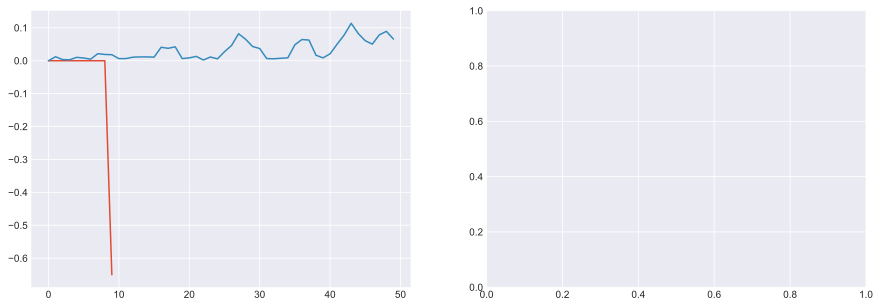

In [26]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

def plot_my_graphs(x1, x2):
    x2_ = int(x2/5)
    axes[0].plot(fixed_tc_diff_capped_array[x1:x2_])
    axes[0].set_label('fixed_tc_df_diff_capped')

    axes[0].plot((fixed_tc_df['1_abs_accel']/100)[x1:x2])
    axes[0].set_label("abs_accel")
    
plot_my_graphs(x1=0, x2=50)

plt.legend()
plt.show()

## Reducing observation space investigation

In [27]:
SUMO_SEEDS = [10, 15, 22, 31, 55, 39, 83, 49, 51, 74]
SUMO_SEEDS = [10, 22, 39, 31, 55]

SUMO_SEEDS = [22, 10, 31]

reducing_obs_dfs = [concaten_summary_for_specific_seed(seed)[1] for seed in SUMO_SEEDS]

# Step 2: Concatenate them along the row axis
reducing_obs_dfs_combined = pd.concat(reducing_obs_dfs, axis=0, ignore_index=False)

df_average_reducing_obs_experiment = reducing_obs_dfs_combined.groupby(reducing_obs_dfs_combined.index).mean()
df_average_reducing_obs_experiment

NameError: name 'concaten_summary_for_specific_seed' is not defined

In [ ]:
df_subset = df_average_reducing_obs_experiment[['sys_abs_accel_episode_sum', 
                             'sys_avg_waiting_time_episode_mean',
                             "sys_total_stopped_episode_mean",
                             "sys_avg_speed_episode_mean",
                             "tot_agent_stopped_episode_mean",
                             "tot_agent_stopped_episode_sum",
                             "tot_agent_accum_wait_time",
                             "all_agents_abs_accel_episode_mean"]]
df_subset

,sys_abs_accel_episode_sum,sys_avg_waiting_time_episode_mean,sys_total_stopped_episode_mean,sys_avg_speed_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time,all_agents_abs_accel_episode_mean
alpha_1,72447.338693,9.086800,1.504933,10.387029,1.504933,7524.666667,10.161133,9.546929
alpha_1_reduced_observations,69703.001034,9.207067,1.427933,10.529821,1.427933,7139.666667,10.143933,9.132686
alpha_1_single_obs,69380.641983,9.410000,1.436067,10.535239,1.436067,7180.333333,10.329467,9.081420
fixed_tc,85161.774898,230.166600,11.170667,6.315644,11.170667,55853.333333,263.392600,12.138420
trained_delta_wait_time,84661.607569,4.857467,1.219667,10.237254,1.219667,6098.333333,6.041000,11.362250


As we reduce the observation space - 